# Needle Segmentation Training Notebook
Written by Aabhas Jain. Much of the code is taken from https://github.com/roboflow/notebooks/blob/main/notebooks/train-yolo11-instance-segmentation-on-custom-dataset.ipynb?ref=blog.roboflow.com

In [ ]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.2/112.6 GB disk)


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


# Download Dataset

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="elxQ9ccu3kaxTrlvDIJT")
project = rf.workspace("mlma-project").project("mlma-segmentation-final")
version = project.version(3)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to MLMA-Segmentation-Final-4 in yolov11:: 100%|██████████| 15192/15192 [00:02<00:00, 5688.18it/s]


In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU found")

True
Tesla T4


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s-seg.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True device=0 batch=-1

/content
100% 19.7M/19.7M [00:00<00:00, 68.8MB/s]
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
New https://pypi.org/project/ultralytics/8.3.115 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=/content/datasets/MLMA-Segmentation-Final-4/data.yaml, epochs=100, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0

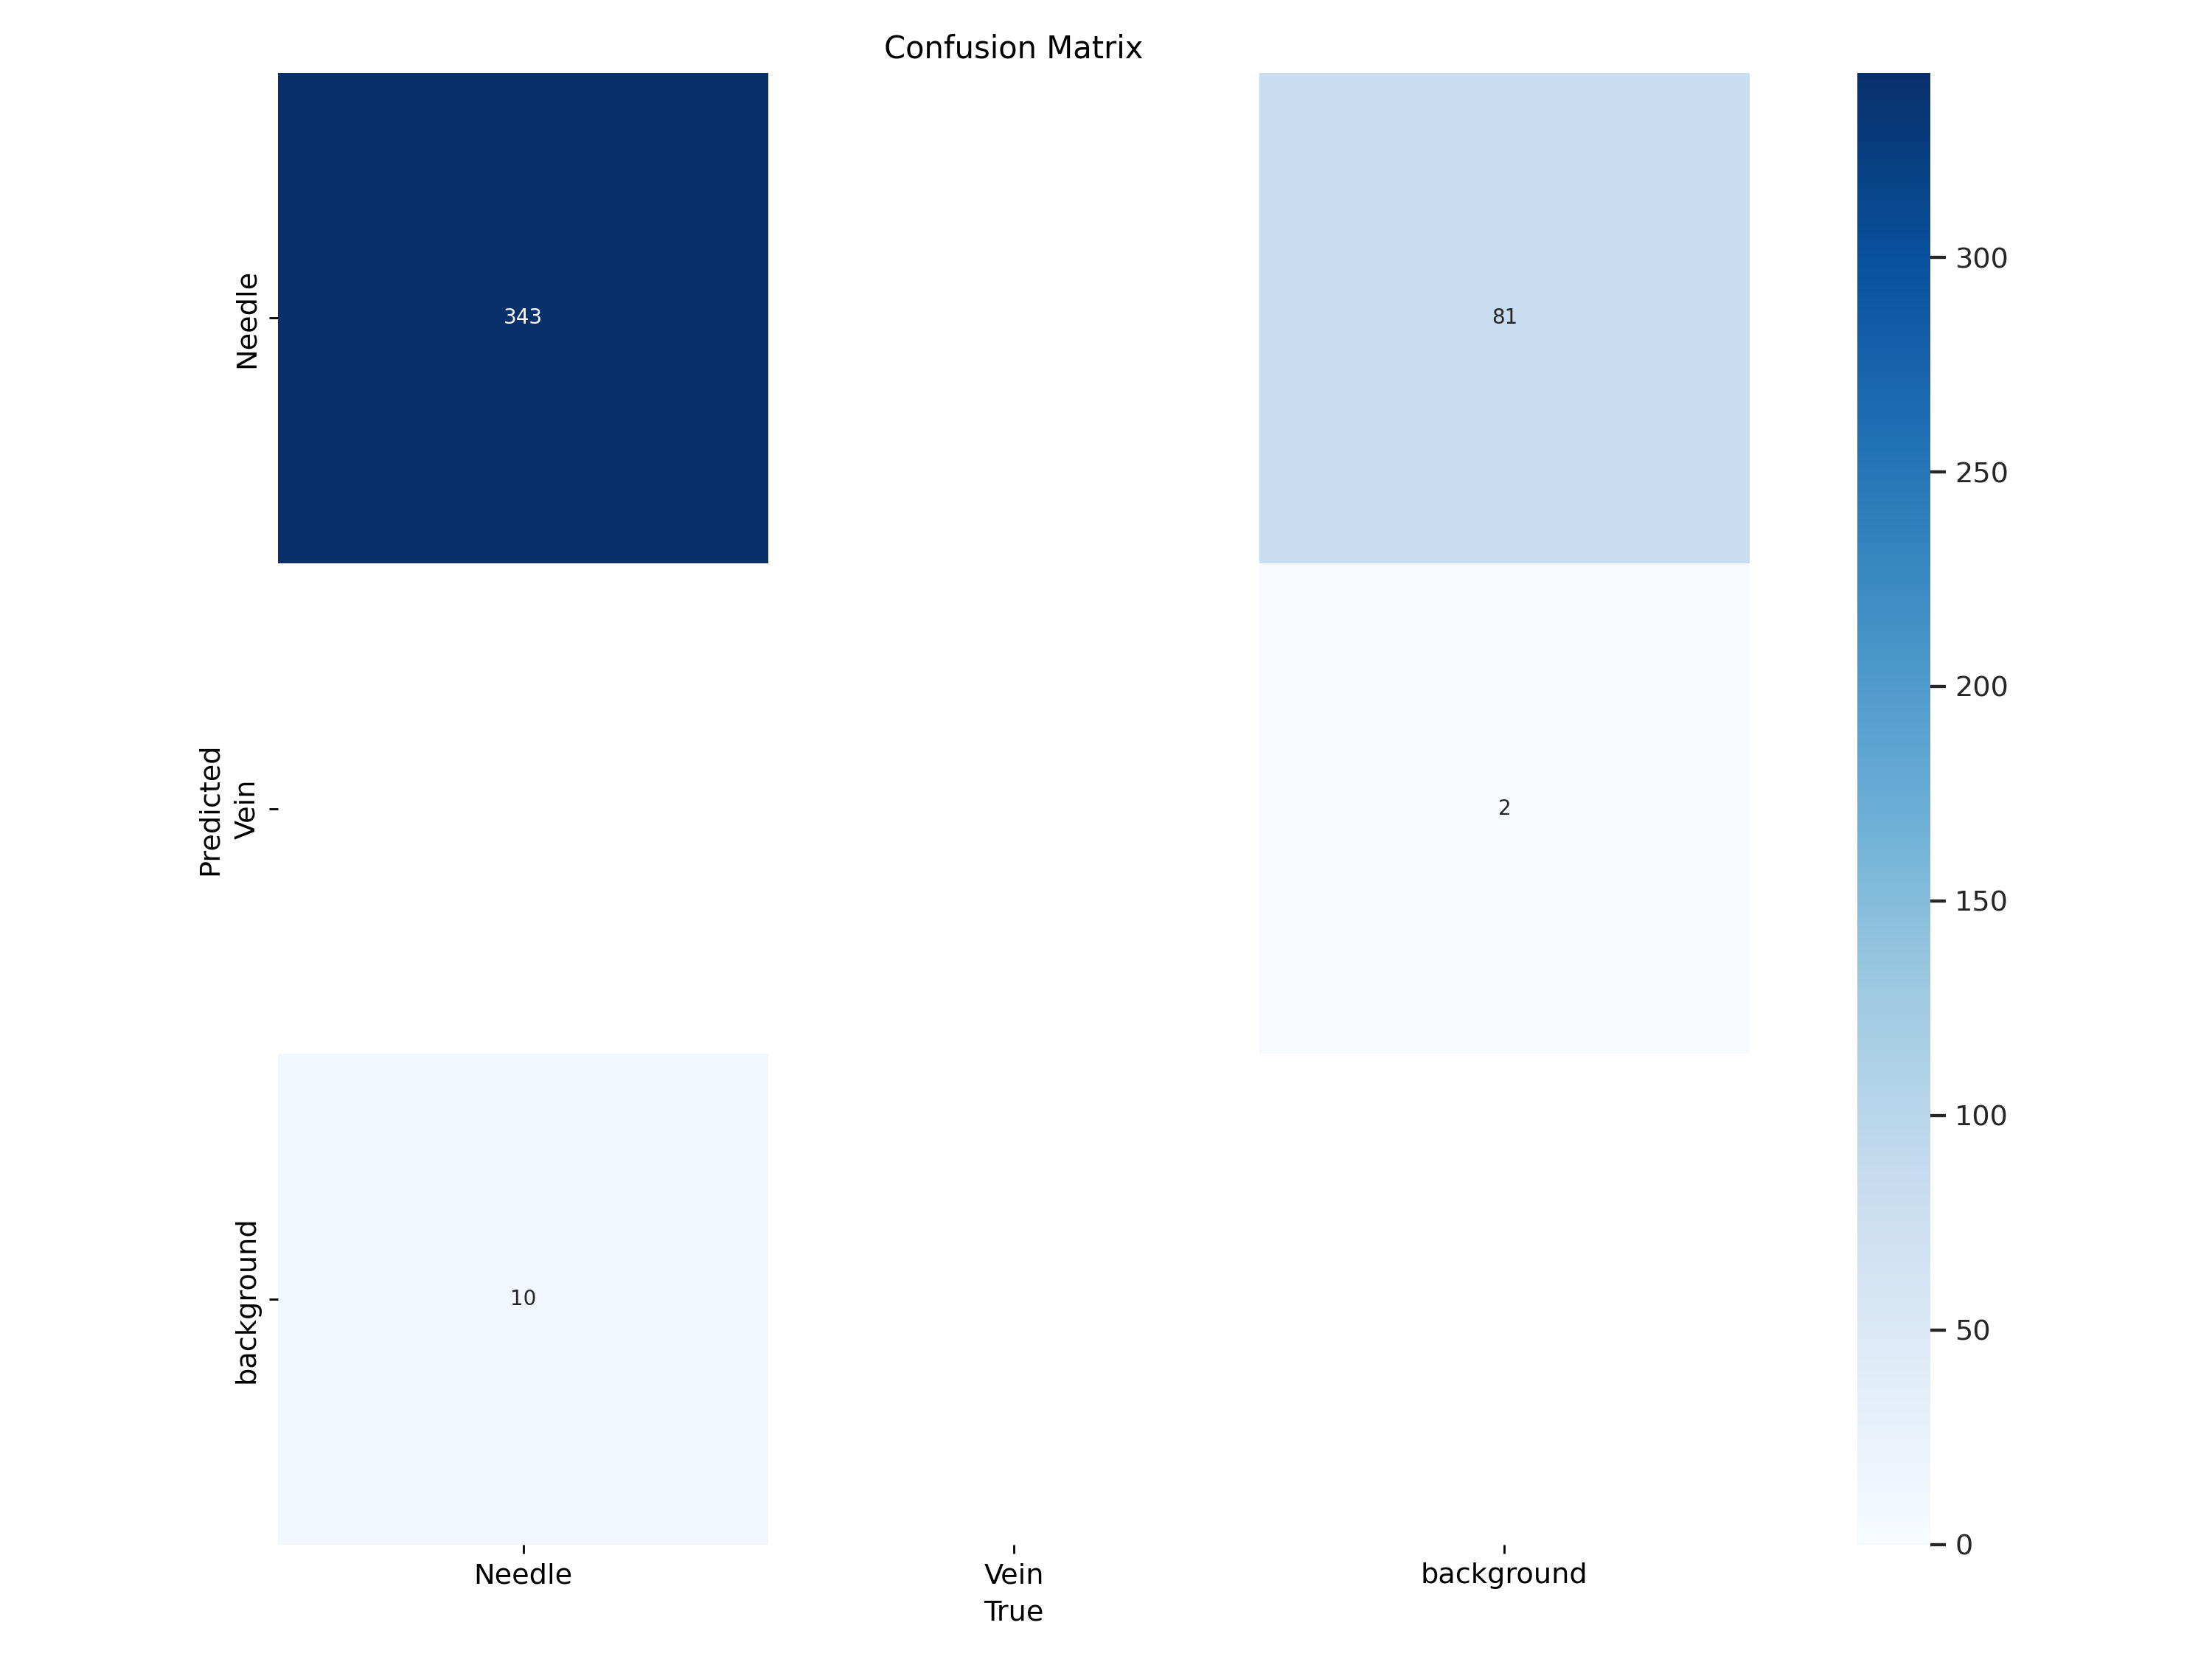

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train2/confusion_matrix.png', width=600)

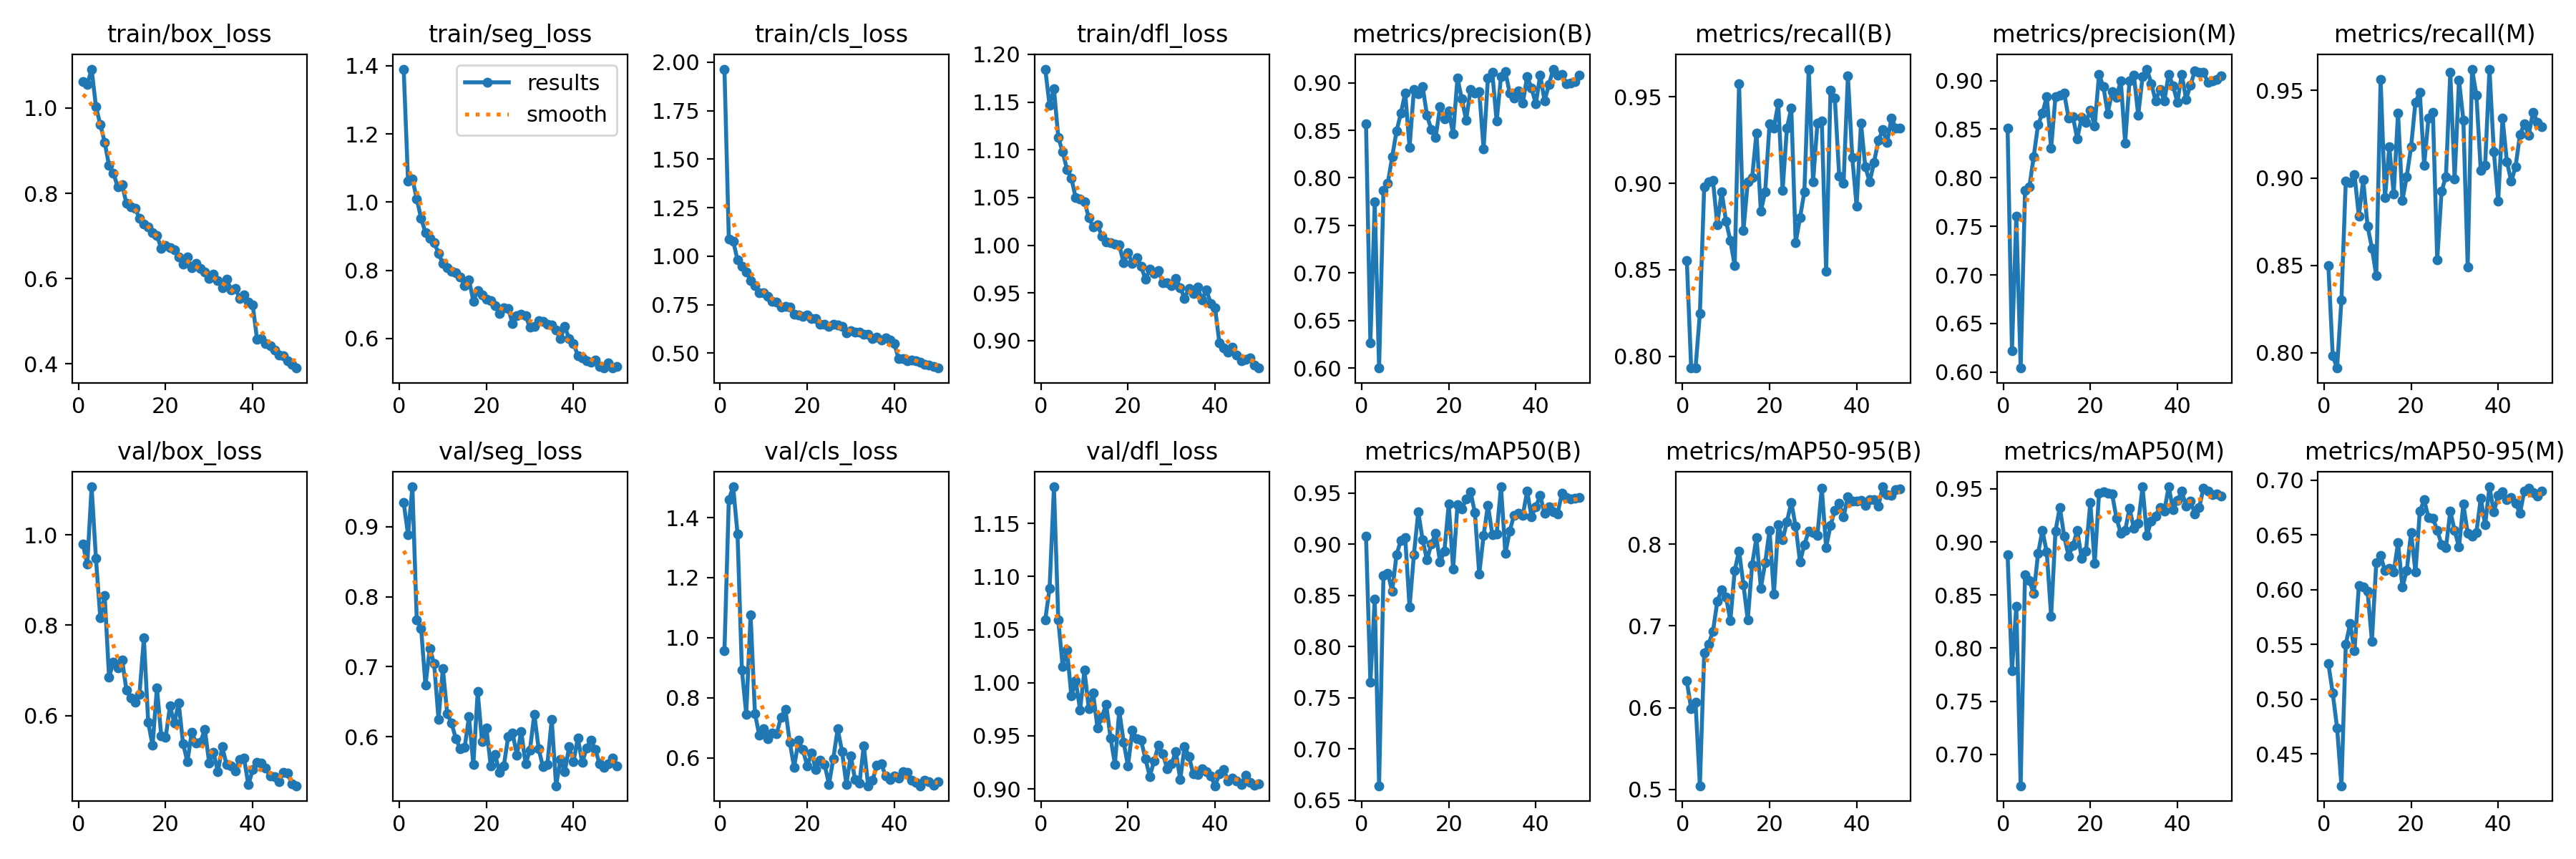

In [ ]:
IPyImage(filename=f'{HOME}/runs/segment/train2/results.png', width=600)


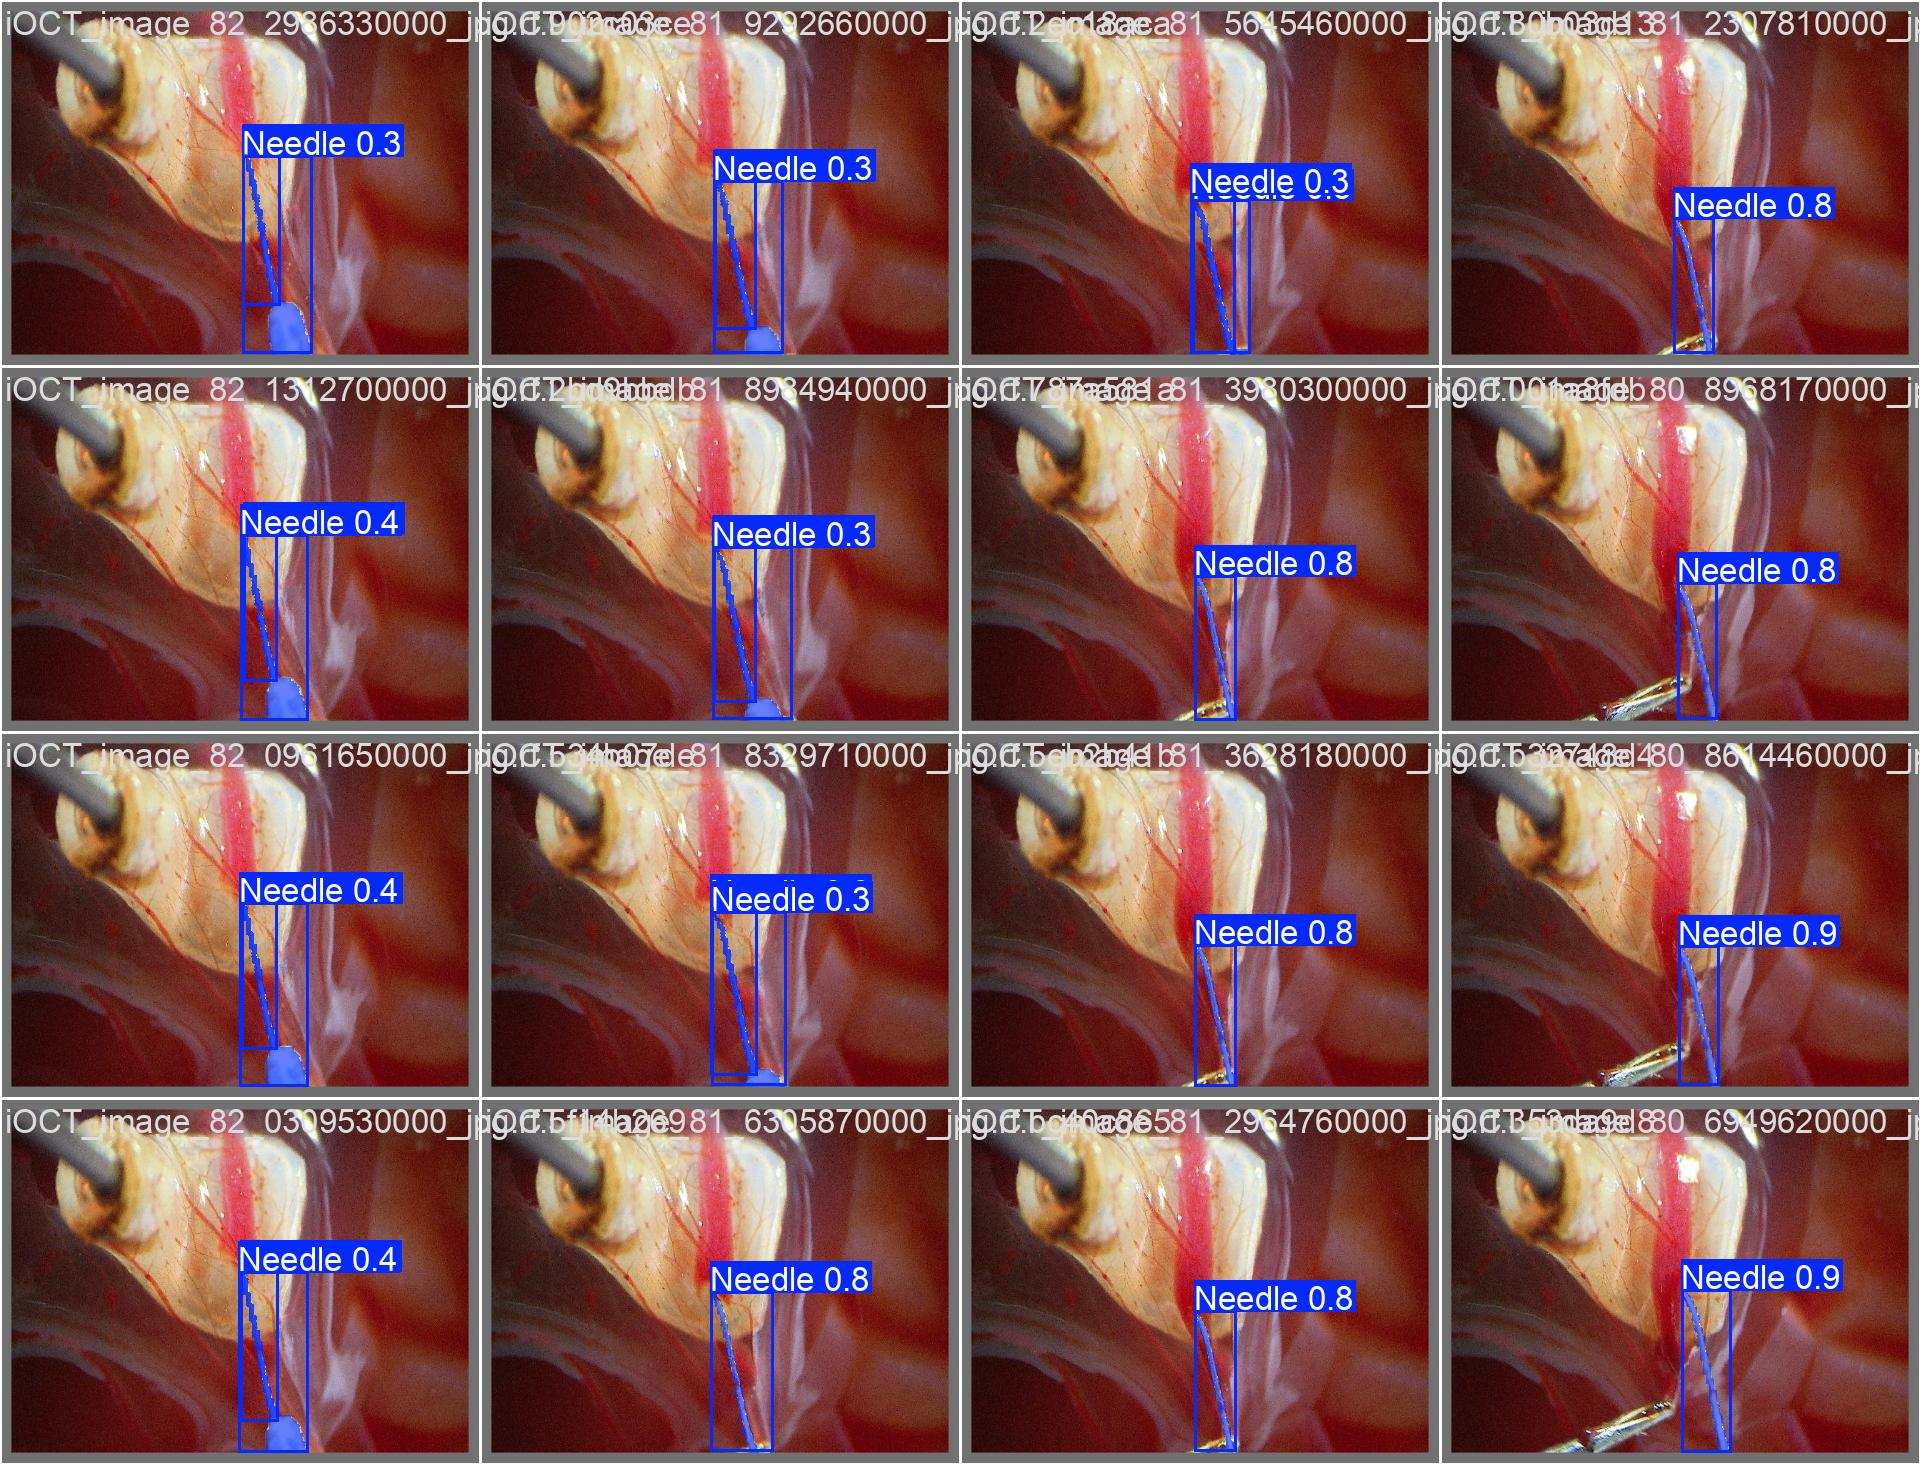

In [ ]:
IPyImage(filename=f'{HOME}/runs/segment/train2/val_batch0_pred.jpg', width=600)